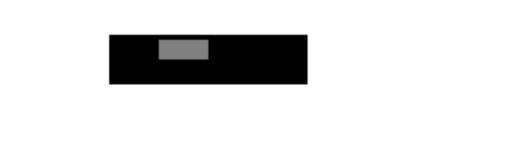

In [79]:

import numpy as np
import matplotlib.pyplot as plt

imagen = np.zeros((50,200))

imagen[10:30,40:120] = 1

imagen[12:20,60:80] = 0.5


plt.imshow(-imagen, cmap='gray')
plt.axis('off')
plt.show()

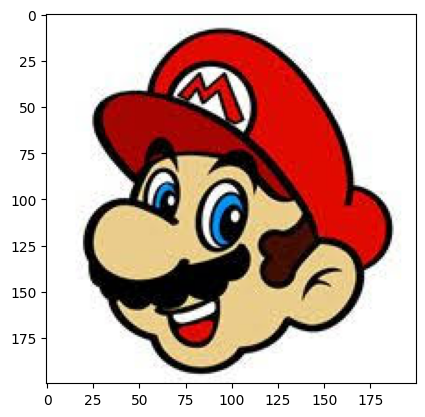

In [17]:
arch = 'Mario.jfif'
img = plt.imread(arch)
plt.imshow(img)
plt.show()

In [23]:
type(img)
img.shape
img[24,125]
img.max(), img.min()

(255, 0)

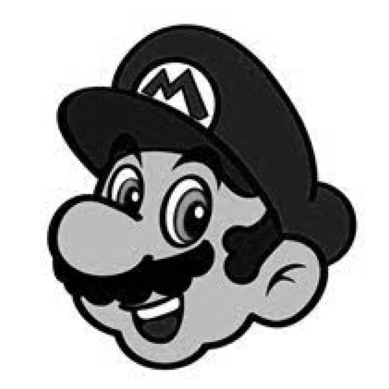

In [24]:

import cv2

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [26]:

gray_img.shape

(200, 200)

In [85]:
import keras
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, UpSampling2D, Conv2D
from keras.models import Model

input_img = keras.Input(shape=(50,200,1))

x=Conv2D(1, (1,1), activation='relu', padding='same')(input_img)

modelo1 = Model(input_img, x)

modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0], dtype=np.float32)])


In [51]:
def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


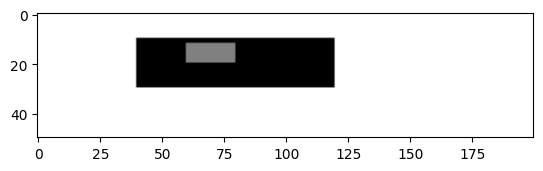

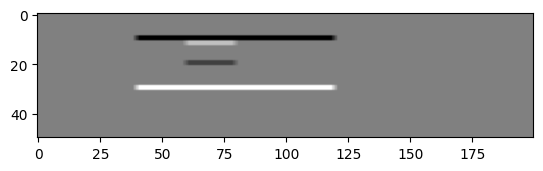

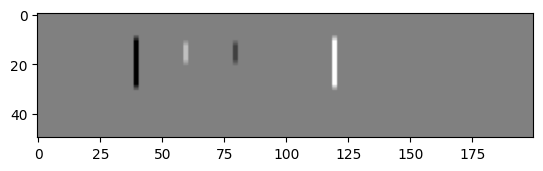

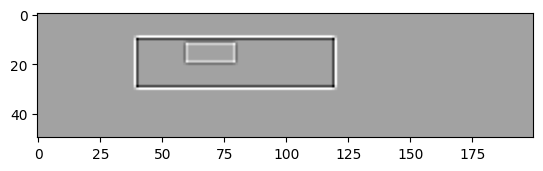

In [84]:
from keras.layers import Input # or from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, UpSampling2D, Conv2D
from keras.models import Model


input_layer = Input(shape=(50,200,1))

x = Conv2D(3, (3,3), activation='linear', padding='same')(input_layer)

modelo2 = Model(input_layer, x)


filtro1 = [[1,0,-1],[1,0,-1],[1,0,-1]]
filtro2 = [[1,1,1],[0,0,0],[-1,-1,-1]]
filtro3 = [[1,2,1],[2,-12,2],[1,2,1]]

filtros = reformar_filtros([filtro1,filtro2,filtro3])

modelo2.set_weights([filtros,np.array([0,0,0

                                       ], dtype=np.float32)])

imgp = modelo2.predict(imagen.reshape(1,50,200,1))

imagencapa1 = np.reshape(imgp[0,:,:,1],(50,200))
imagencapa2 = np.reshape(imgp[0,:,:,0],(50,200))
imagencapa3 = np.reshape(imgp[0,:,:,2],(50,200))

plt.imshow(-imagen, cmap='gray')

plt.show()

plt.imshow(imagencapa1, cmap='gray')

plt.show()

plt.imshow(imagencapa2, cmap='gray')

plt.show()


plt.imshow(imagencapa3, cmap='gray')

plt.show()


